In [1]:
import seaborn as sns

from scipy.stats import kurtosis, skew

from rcv_distribution import *
from MDS_analysis import *
from voting_rules import *

Fist we run MDS to see the ordering of the candidates

In [4]:
# Test the function with a custom CSV file
csv = "dataverse_files/Corvallis_11082022_Mayor.csv"

ballots, candidates = parse_election_data(csv)

# Perform the RCV analysis
test = perform_rcv_analysis(ballots, candidates, n_runs=1000, metric=False)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test


c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\cleaned files\MDS_analysis.py:162: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


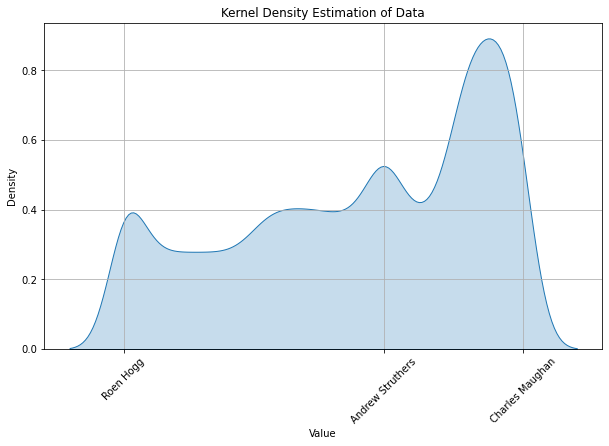

In [5]:
normalized_distances = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
plot_KDE(ballots, normalized_distances)

In [6]:
print("gamma is: ", get_permissive_gamma(ballots, normalized_distances)[1])

gamma is:  0.8062606163552536


In [7]:
whole_election = voting_rules(ballots, candidates)
print(whole_election.irv())

Charles Maughan


In [8]:
consistent_ballots = get_permissive_gamma(ballots, normalized_distances)[0]
consistent_election = voting_rules(consistent_ballots, candidates)
print(consistent_election.irv())

Andrew Struthers


In [14]:
empty = 0
for b in ballots:
    if len(b) == 0:
        empty += ballots[b]

total_voters = (sum(ballots.values()) - empty)
num_non_consitent = total_voters - sum(consistent_ballots.values())
print(num_non_consitent)

3992


In [27]:
import random
random_ballots = consistent_ballots
for i in range(num_non_consitent):
    not_added = True
    while not_added is True:
        length = random.randint(3, len(candidates))
    
        ranking = ()
        for j in range(length):
            found_candidate = False
            while found_candidate is False:
                random_candidate = random.choice(candidates)
                if (random_candidate not in ranking):
                    ranking += (random_candidate,)
                    found_candidate = True                
        b_num = ballot_to_num(ranking, normalized_distances)
        lp = solve_lp(b_num, len(normalized_distances))
        if (ranking not in consistent_ballots):
            not_added = False
            if (ranking not in random_ballots):
                random_ballots[ranking] = 0
            random_ballots[ranking] += 1




KeyboardInterrupt: 

In [28]:
import itertools

def all_permutations(lst):
    result = []
    # Generate all subsets of all possible lengths
    for r in range(1, len(lst) + 1):
        subsets = itertools.combinations(lst, r)
        # For each subset, generate all permutations
        for subset in subsets:
            perms = itertools.permutations(subset)
            result.extend(perms)
    return result

def get_inconsistent(candidates):
    possible_inconsistent = []
    all_ballots = all_permutations(candidates)
    for b in all_ballots:
        b_num = ballot_to_num(b, normalized_distances)
        lp = solve_lp(b_num, len(normalized_distances))
        if lp[0] is False:
            possible_inconsistent.append(b)



(1,)
(2,)
(3,)
(4,)
(1, 2)
(2, 1)
(1, 3)
(3, 1)
(1, 4)
(4, 1)
(2, 3)
(3, 2)
(2, 4)
(4, 2)
(3, 4)
(4, 3)
(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)
(1, 2, 4)
(1, 4, 2)
(2, 1, 4)
(2, 4, 1)
(4, 1, 2)
(4, 2, 1)
(1, 3, 4)
(1, 4, 3)
(3, 1, 4)
(3, 4, 1)
(4, 1, 3)
(4, 3, 1)
(2, 3, 4)
(2, 4, 3)
(3, 2, 4)
(3, 4, 2)
(4, 2, 3)
(4, 3, 2)
(1, 2, 3, 4)
(1, 2, 4, 3)
(1, 3, 2, 4)
(1, 3, 4, 2)
(1, 4, 2, 3)
(1, 4, 3, 2)
(2, 1, 3, 4)
(2, 1, 4, 3)
(2, 3, 1, 4)
(2, 3, 4, 1)
(2, 4, 1, 3)
(2, 4, 3, 1)
(3, 1, 2, 4)
(3, 1, 4, 2)
(3, 2, 1, 4)
(3, 2, 4, 1)
(3, 4, 1, 2)
(3, 4, 2, 1)
(4, 1, 2, 3)
(4, 1, 3, 2)
(4, 2, 1, 3)
(4, 2, 3, 1)
(4, 3, 1, 2)
(4, 3, 2, 1)


In [26]:
for b in random_ballots:
    if b not in consistent_ballots:
        print(b)

In [24]:
random_election = voting_rules(random_ballots, candidates)
print(random_election.irv())

Charles Maughan


Run this cell to see all the consistent and inconsistent ballots 

In [42]:
print("normalized distances: ", normalized_distances)
consistent_ballots = get_permissive_gamma(ballots, normalized_distances)[0]
print("consistent ballots: ")
for b in consistent_ballots:
    print(b, ": ", consistent_ballots[b])
print("inconsistent ballots: ")
inconsiste_ballots = {}
total = 0
for b in ballots:
    if len(b) > 0:
        total += ballots[b]
    if b not in consistent_ballots:
        inconsiste_ballots[b] = ballots[b]
        print(b, ": ", ballots[b])
print(total)

normalized distances:  {'Hinda Miller': 0.0, 'Bob Kiss': 0.5251368724655281, 'Kevin Curley': 1.144207442687659, 'Loyal Ploof': 2.618186888011694, 'Louie the Cowman Beaudin': 4.0}
consistent ballots: 
('Hinda Miller', 'Kevin Curley', 'Louie the Cowman Beaudin') :  10
('Bob Kiss', 'Hinda Miller', 'Loyal Ploof') :  86
('Hinda Miller', 'Bob Kiss') :  886
('Bob Kiss', 'Hinda Miller') :  1142
('Bob Kiss', 'Hinda Miller', 'Louie the Cowman Beaudin') :  77
('Bob Kiss', 'Hinda Miller', 'Kevin Curley') :  254
('Hinda Miller',) :  551
('Bob Kiss', 'Kevin Curley', 'Hinda Miller', 'Loyal Ploof', 'Louie the Cowman Beaudin') :  75
('Hinda Miller', 'Bob Kiss', 'Kevin Curley') :  202
('Bob Kiss',) :  495
('Hinda Miller', 'Bob Kiss', 'Kevin Curley', 'Loyal Ploof', 'Louie the Cowman Beaudin') :  96
('Kevin Curley',) :  802
('Bob Kiss', 'Loyal Ploof', 'Hinda Miller') :  25
('Hinda Miller', 'Bob Kiss', 'Kevin Curley', 'Louie the Cowman Beaudin') :  31
('Bob Kiss', 'Kevin Curley') :  213
('Hinda Miller', 'B

assign the two candidates you want to examin to candidate1 and candidiate 2

In [43]:
candidate1 = 'Robin Wonsley Worlobah'
candidate2 = 'Yusra Arab'

In [35]:
c1 = 0
c2 = 0
total = 0
for b in ballots:
    if (len(b) > 0):
        total += ballots[b]
        if candidate1 in b or candidate2 in b:
            if candidate2 not in b and candidate1 in b:
                c1 += ballots[b]
                continue
            if candidate1 not in b and candidate2 in b:
                c2 += ballots[b]
                continue
            if b.index(candidate2) < b.index(candidate1):
                c2 += ballots[b]
            else:
                c1 += ballots[b]
print("the whole election: ")
print("total: ", total)
print(candidate1, ": ", c1)
print(candidate2, ": ", c2)


the whole election: 
total:  9521
Robin Wonsley Worlobah :  4056
Yusra Arab :  4037


now just look at the consistent ballots

In [36]:
c1 = 0
c2 = 0
total = 0
for b in consistent_ballots:
    if (len(b) > 0):
        total += ballots[b]
        if candidate1 in b or candidate2 in b:
            if candidate2 not in b and candidate1 in b:
                c1 += ballots[b]
                continue
            if candidate1 not in b and candidate2 in b:
                c2 += ballots[b]
                continue
            if b.index(candidate2) < b.index(candidate1):
                c2 += ballots[b]
            else:
                c1 += ballots[b]
print("Linear voters only: ")
print("total: ", total)
print(candidate1, ": ", c1)
print(candidate2, ": ", c2)


Linear voters only: 
total:  7626
Robin Wonsley Worlobah :  2645
Yusra Arab :  3594


In [44]:
election = voting_rules(ballots, candidates)
election2 = voting_rules(consistent_ballots, candidates)


In [45]:
print(election.irv())
print(election2.irv())

Bob Kiss
Bob Kiss
